# SIR Peak Infection Challenge

You are the chief epidemiologist of the [McMurdo](https://en.wikipedia.org/wiki/McMurdo_Station) Antartic Research Station, a scientific outpost with a population of 1000 persons. A new and unusual disease, currently known as penguin foot, has struck 10 individuals in the camp, and seems to be spreading. 

The disease has several properties. While infected (and contagious), individuals behave as normal but are unable to drive [snow machines](https://youtu.be/gcIwrdeP21s?t=1m46s), the base's primary mode of evacuation in case of an emergency. (It is universally acknowledged that penguins cannot drive snow machines.) Snow machines can carry one passenger in addition to the driver, and so at any given time, at least half of the population must be able to drive.

The period of infection is on average 10 days, after which individuals return to their normal state and are immune to further infection. The infectivity of the disease is much less well known. The chance of infection from an encounter between an infected and a non-infected person could be anywhere from 0.5% to 10%.

As there are no lasting consequences of penguin foot, the base has continued to operate as normal, with each individual coming into contact with about 25 people per day, with relatively uniform mixing between individuals. 


The primary danger posed by the disease is that there will come a point when there aren't enough people to drive snow machines. Your task is to calculate the maximum number of infections for a range of values of infectivity between `.005` and `0.1`.

Specifically, you need to know the minimum value of infectivity that is sufficient to incapacitate over half the base at one time, so that as new measurements become available, you can assess the risk of this possibility.

### Load libraries
The cell below gets us started by loading the plotting library. 

Add a line to this cell to load the `pysd` library using the standard python [import](https://www.codementor.io/python/tutorial/python-path-virtualenv-import-for-beginners) [syntax](https://docs.python.org/2/tutorial/modules.html#modules). 

In [1]:
%pylab inline
import pysd

Populating the interactive namespace from numpy and matplotlib


/Users/houghton/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


### Load model
Now, use PySD's `load_vensim` [function](http://pysd.readthedocs.io/en/master/functions.html#pysd.read_vensim) to read the SIR model found at relative location: '`../../models/Epidemic/SIR.mdl`', and name the resulting object '`model`'.

In [2]:
model = pysd.read_vensim('../../models/Epidemic/SIR.mdl')

Just to practice, [run the model](http://pysd.readthedocs.io/en/master/functions.html#pysd.PySD.run), using the `.run()` function's `params` argument to set the value of `Infectivity` to `0.02`. 

Save the result in a variable named `res`. 

In [3]:
res = model.run(params={'Infectivity': 0.02})

The cell below contains code to plot the result of your simulation. Execute it and ensure that everything is working properly.

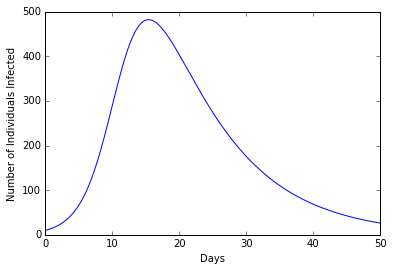

In [4]:
res['Infected'].plot()
plt.xlabel('Days')
plt.ylabel('Number of Individuals Infected');

### Identify the peak for this base case run
In the cell below, write an expression to calculate (for your base case) the [maximum](find ref to pandas max) number of individuals who are infected at any one time. You'll need to use Pandas syntax to select the column named 'Infected' and then use the Pandas functions referenced above.

In [5]:
peak_value = res['Infected'].max()

print('Up to', int(peak_value), 'individuals are infected at one time.')

Up to 481 individuals are infected at one time.


### Define the range of infectivities we want to sweep over

To identify the worst case scenario, we need to sweep over the plausible values of `infectivity`, from 0.005 to 0.1, in increments of .005. Our next step is to generate an array of these values. We can use the python package [numpy]() which handles matrix mathematics and array manipulation. (It is common practice to give the numpy module the short handle '`np`' as I have done below). 

You'll specifically want to use the `np.arange(...)` function, which extends the python standard `range` function to handle non-integer values. Consult the [numpy documentation]() to determine the arguments you'll want to pass in to this function to generate an array that looks like:
```
[0.005, 0.01, 0.015, ... 0.095, 0.1]
```
You may have to be creative to ensure that the last value in the array is actually `0.1`.

In [6]:
import numpy as np
infectivity_values = np.arange(.005, .105, .005)
print(infectivity_values)

[ 0.005  0.01   0.015  0.02   0.025  0.03   0.035  0.04   0.045  0.05
  0.055  0.06   0.065  0.07   0.075  0.08   0.085  0.09   0.095  0.1  ]


### Evaluate the peak of infections for each value of infectivity
We now want to calculate the peak for the list of possible infectivities, and collect them in a pair of lists. To do this, write a for loop that iterates over each value in the array of infectivites. I've started this off for you below.

Within the body of the for loop, run the model with that value of infectivity, saving the result to a variable named res. Then use python's [list append]() syntax to add the appropriate values to the end of the `peak_value_list`.

In [7]:
peak_value_list = []

for inf in infectivity_values:
    res = model.run(params={'Infectivity': inf})
    peak_value_list.append(res['Infected'].max())

peak_value_list

[24.920470547371014,
 237.97922024327414,
 384.66967921830297,
 481.85895379444457,
 550.67600418727307,
 602.12150226696349,
 642.16965211799061,
 674.33328489439248,
 700.80810743824316,
 722.99952975221777,
 741.95772871024531,
 758.31312873507852,
 772.60053450355554,
 785.18997244874424,
 796.45654025313729,
 806.51646286134962,
 815.56083132975607,
 823.81875673147522,
 831.29758845196977,
 838.19886052750587]

### Plot the result
Now create a plot showing showing the values of infectivity on the x-axis, and the peak value of the infections on the y axis. Label each axis, and give the plot a title. From this plot we can eyeball the value of infectivity beyond which the peak level of infections rises over 500.

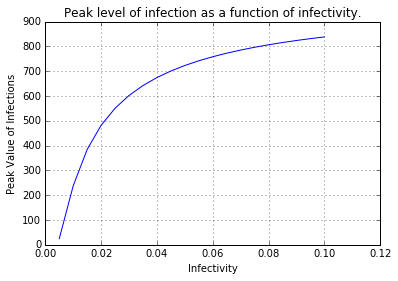

In [8]:
plt.plot(infectivity_values, peak_value_list)
plt.grid()
plt.xlabel('Infectivity')
plt.ylabel('Peak Value of Infections')
plt.title('Peak level of infection as a function of infectivity.');

## Bonus Activities
1. Identify the first day that the base might not be able to evacuate, for any value of infectivity.
2. Identify the maximum total number of days that the base might be unable to evacuate, for the range of values of infectivity listed above.
3. Come up with a better story for this example than 'penguin foot'. =)

    